# Loading Libraries , packages and modules for project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#from sklearn.impute import KNNImputer 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import KFold

# Loading Data file (database_IND.csv)

In [2]:
df = pd.read_csv('database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data exploration

In [4]:
df.shape #rows, columns

(907, 27)

In [5]:
df.columns 

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

to disply datadypes of the coloum

In [6]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
df.index  #starting no and ending no

RangeIndex(start=0, stop=907, step=1)

In [8]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [9]:
print ('train data size', df.shape)
print ('test data size', df.shape)

train data size (907, 27)
test data size (907, 27)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
country                     907 non-null object
country_long                907 non-null object
name                        907 non-null object
gppd_idnr                   907 non-null object
capacity_mw                 907 non-null float64
latitude                    861 non-null float64
longitude                   861 non-null float64
primary_fuel                907 non-null object
other_fuel1                 198 non-null object
other_fuel2                 1 non-null object
other_fuel3                 0 non-null float64
commissioning_year          527 non-null float64
owner                       342 non-null object
source                      907 non-null object
url                         907 non-null object
geolocation_source          888 non-null object
wepp_id                     0 non-null float64
year_of_capacity_data       519 non-null float64
generation_gwh_2013         0 

# Exploratory Data Analysis (EDA)

# Data Distributions

In [11]:
#Target column is Primary Fuel (1) or  capacity_mw  (0)
df['primary_fuel'].unique() # finding the number of classes

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [12]:
df['capacity_mw'].unique() # finding the number of classes

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [13]:
df.dtypes=='object'

country                      True
country_long                 True
name                         True
gppd_idnr                    True
capacity_mw                 False
latitude                    False
longitude                   False
primary_fuel                 True
other_fuel1                  True
other_fuel2                  True
other_fuel3                 False
commissioning_year          False
owner                        True
source                       True
url                          True
geolocation_source           True
wepp_id                     False
year_of_capacity_data       False
generation_gwh_2013         False
generation_gwh_2014         False
generation_gwh_2015         False
generation_gwh_2016         False
generation_gwh_2017         False
generation_gwh_2018         False
generation_gwh_2019         False
generation_data_source       True
estimated_generation_gwh    False
dtype: bool

In [14]:
df.country_long.nunique()

1

In [15]:
countries_plant = df.country_long.value_counts().head(20)
countries_plant

India    907
Name: country_long, dtype: int64

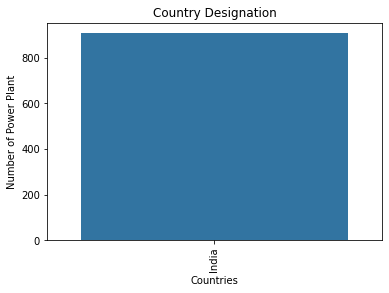

In [16]:
sns.barplot(x = countries_plant.index, y = countries_plant)
plt.xticks(rotation = 90)
plt.title('Country Designation')
plt.ylabel('Number of Power Plant')
plt.xlabel('Countries');


In [17]:
print (df['primary_fuel'].value_counts())
print ('*****************', '\n')
#Percentage ratios of classes or class balance check
print ('the percentage of primary_fuel: ',round(df['primary_fuel'].value_counts()[1]/len(df), 2)*100, '%')
#print ('the percentage of capacity_mw: ',round(df['capacity_mw'].value_counts()[0]/len(df), 2)*100, '%')

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
***************** 

the percentage of primary_fuel:  28.000000000000004 %


In [18]:
primary_fuel = df.primary_fuel.value_counts() * 100 /df.primary_fuel.count()
primary_fuel

Coal       28.445424
Hydro      27.673649
Solar      14.002205
Wind       13.561191
Gas         7.607497
Biomass     5.512679
Oil         2.205072
Nuclear     0.992282
Name: primary_fuel, dtype: float64

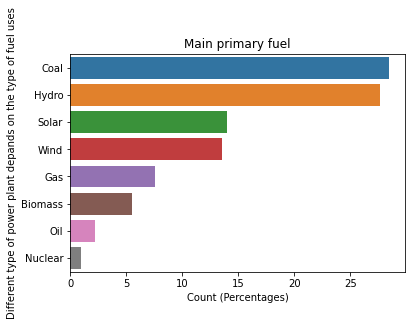

In [19]:
sns.barplot(x = primary_fuel, y = primary_fuel.index)
plt.title('Main primary fuel')
plt.xlabel('Count (Percentages)');
plt.ylabel('Different type of power plant depands on the type of fuel uses');

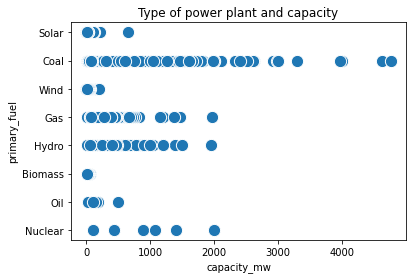

In [20]:
sns.scatterplot(x = df.capacity_mw, y = df.primary_fuel, s = 150)
plt.title('Type of power plant and capacity');

In [21]:
print (df['capacity_mw'].value_counts())
print ('*****************', '\n')
#Percentage ratios of classes or class balance check
print ('the percentage of capacity_mw: ',round(df['capacity_mw'].value_counts()[1]/len(df), 2)*100, '%')
#print ('the percentage of capacity_mw: ',round(df['capacity_mw'].value_counts()[0]/len(df), 2)*100, '%')

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
31.2       1
105.7      1
63.2       1
49.6       1
2.5        1
Name: capacity_mw, Length: 361, dtype: int64
***************** 

the percentage of capacity_mw:  2.0 %


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

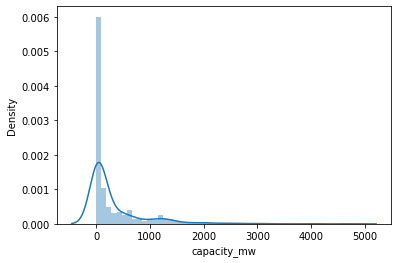

In [22]:
sns.distplot(df['capacity_mw'])

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

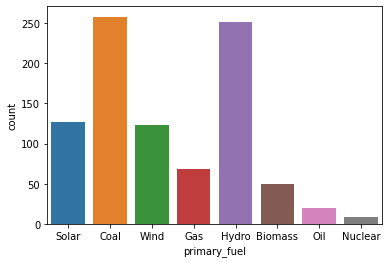

In [23]:
sns.countplot(df['primary_fuel'])

In [24]:
df.isnull().sum()


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [25]:
df.drop(['country', 'country_long', 'name', 'gppd_idnr','other_fuel1','other_fuel2', 'other_fuel3', 'owner','wepp_id',
        'generation_gwh_2013', 'url','generation_gwh_2014', 'generation_gwh_2019',
        'estimated_generation_gwh','generation_data_source'],axis=1, inplace=True )

In [26]:
df.shape

(907, 12)

In [27]:
df.isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [28]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df['commissioning_year']= df['commissioning_year'].fillna(df['commissioning_year'].median())

df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())



In [29]:
df['geolocation_source']= df['geolocation_source'].fillna('WRI')


In [30]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64


# Data Skewness and Kurtosis

In [31]:
df.dtypes

capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
commissioning_year       float64
source                    object
geolocation_source        object
year_of_capacity_data    float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
dtype: object

In [32]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [33]:
cont_cols =['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'year_of_capacity_data', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018']

In [34]:
from scipy.stats import skew, kurtosis
for i in cont_cols:
    print ('*******skewness of', i, ' column**********')
    print (skew(df[i]))
    print ('*******kurtosis of', i, ' column**********')
    print (kurtosis(df[i]))

*******skewness of capacity_mw  column**********
3.1184079967331835
*******kurtosis of capacity_mw  column**********
12.868547820772433
*******skewness of latitude  column**********
-0.14945055596924278
*******kurtosis of latitude  column**********
-0.5230817067524041
*******skewness of longitude  column**********
1.1399913480525616
*******kurtosis of longitude  column**********
1.6523706352912022
*******skewness of commissioning_year  column**********
-1.7167303369395963
*******kurtosis of commissioning_year  column**********
4.00052765240989
*******skewness of year_of_capacity_data  column**********
0.0
*******kurtosis of year_of_capacity_data  column**********
-3.0
*******skewness of generation_gwh_2015  column**********
5.355258888519198
*******kurtosis of generation_gwh_2015  column**********
39.40907696527201
*******skewness of generation_gwh_2016  column**********
5.0600405946953915
*******kurtosis of generation_gwh_2016  column**********
35.48164471481999
*******skewness of gen

In [35]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [36]:
df.dtypes

capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
commissioning_year       float64
source                    object
geolocation_source        object
year_of_capacity_data    float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
dtype: object

In [37]:
#Encoding the data
df1=pd.get_dummies(df)
df1.head()


,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel_Biomass,...,source_Vishwanath Sugars ltd,source_Welspun Solar AP Private Limited,source_Welspun Solar Punjab Private Limited,source_West Bengal Energy Development Corporation Limited (WBEDCL),source_West Coast Paper Mills Ltd.,source_Yashwantrao Krishna ssk,source_Ym Ssk ltd,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,28.1839,73.2407,2011.0,2019.0,2428.226946,2467.936859,2547.759305,2600.804099,0,...,0,0,0,0,0,0,0,0,1,0
1,98.0,24.7663,74.6090,2001.0,2019.0,2428.226946,2467.936859,2547.759305,2600.804099,0,...,0,0,0,0,0,0,0,0,0,1
2,39.2,21.9038,69.3732,2001.0,2019.0,2428.226946,2467.936859,2547.759305,2600.804099,0,...,0,0,0,0,0,0,0,0,0,1
3,135.0,23.8712,91.3602,2004.0,2019.0,843.747000,886.004428,663.774500,626.239128,0,...,0,0,0,0,0,0,0,0,0,1
4,1800.0,21.9603,82.4091,2015.0,2019.0,5916.370000,6243.000000,5385.579736,7279.000000,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
corr= df1.corr()
corr

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel_Biomass,...,source_Vishwanath Sugars ltd,source_Welspun Solar AP Private Limited,source_Welspun Solar Punjab Private Limited,source_West Bengal Energy Development Corporation Limited (WBEDCL),source_West Coast Paper Mills Ltd.,source_Yashwantrao Krishna ssk,source_Ym Ssk ltd,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
capacity_mw,1.000000,0.050984,0.195882,0.211042,NaN,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01,-0.125391,...,-0.017532,-0.015560,-0.024728,-0.018264,-0.017250,-0.017476,-0.017476,-0.202487,-0.028986,0.205284
latitude,0.050984,1.000000,0.036362,0.087937,NaN,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02,-0.148583,...,-0.026906,0.033988,0.057951,0.013770,-0.032508,-0.022051,-0.022048,0.177838,0.069868,-0.188890
longitude,0.195882,0.036362,1.000000,0.029893,NaN,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02,-0.089687,...,-0.019022,-0.036660,-0.037186,0.066344,-0.019594,-0.022238,-0.022235,-0.245891,-0.071594,0.256332
commissioning_year,0.211042,0.087937,0.029893,1.000000,NaN,1.457447e-01,1.687991e-01,1.690159e-01,1.724914e-01,0.041714,...,0.005738,0.005738,0.008119,0.005738,0.005738,0.005738,0.005738,0.067112,0.070958,-0.079913
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
source_Yashwantrao Krishna ssk,-0.017476,-0.022051,-0.022238,0.005738,NaN,1.287002e-17,9.286123e-18,1.098627e-17,-9.411816e-18,0.137544,...,-0.001104,-0.001104,-0.001562,-0.001104,-0.001104,1.000000,-0.001104,-0.012911,-0.002211,0.013159
source_Ym Ssk ltd,-0.017476,-0.022048,-0.022235,0.005738,NaN,1.287002e-17,9.286123e-18,1.098627e-17,-9.411816e-18,0.137544,...,-0.001104,-0.001104,-0.001562,-0.001104,-0.001104,-0.001104,1.000000,-0.012911,-0.002211,0.013159
geolocation_source_Industry About,-0.202487,0.177838,-0.245891,0.067112,NaN,-5.699183e-18,-3.340656e-17,1.402228e-16,8.893931e-18,-0.093865,...,-0.012911,0.085492,0.120971,0.085492,-0.012911,-0.012911,-0.012911,1.000000,-0.025864,-0.981106
geolocation_source_National Renewable Energy Laboratory,-0.028986,0.069868,-0.071594,0.070958,NaN,2.578276e-17,1.860307e-17,2.200900e-17,-1.885487e-17,-0.016076,...,-0.002211,-0.002211,-0.003129,-0.002211,-0.002211,-0.002211,-0.002211,-0.025864,1.000000,-0.168032


In [39]:
#One Hot encoding through dummies method in Pandas
X=df1.copy()
X.drop(['capacity_mw'], axis=1, inplace =True)


In [40]:
Y = df1['capacity_mw']
Y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

# Data Splitting

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=200) 
y_train

428    105.0
851      1.7
496     11.2
401      5.2
856    672.0
       ...  
810    600.0
836      1.5
784      4.5
617     19.0
794     13.5
Name: capacity_mw, Length: 725, dtype: float64

In [55]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(x_train, y_train)
predicted_values = LR_model.predict(x_test)
df1_LR = pd.DataFrame({'real_value':y_test, 'predicted_values':predicted_values})
df1_LR

,real_value,predicted_values
273,75.00,6.340625e+01
514,45.50,-1.726125e+06
45,600.00,8.072031e+02
715,300.00,3.510938e+01
689,12.50,3.185286e+06
...,...,...
553,7.20,3.148438e+01
871,30.75,2.628125e+01
295,427.50,6.704219e+02
534,250.00,5.446094e+02


In [58]:
LR_model.score(x_test, y_test)

-1663050.2689641784